In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy

In [2]:
movie_title_path = './movie_titles.csv'
file = open(movie_title_path,'r')
datadict = {"MovieID":[],"Year":[],"Title":[]}
for line in file:
    movie_id,year,title = line.split(',',maxsplit= 2)
    datadict['MovieID'].append(int(movie_id))
    datadict['Year'].append(year) 
    datadict['Title'].append(title)
file.close()

In [3]:
movie_title = pd.DataFrame(datadict)
movie_title.head()

,MovieID,Year,Title
0,1,2003,Dinosaur Planet\n
1,2,2004,Isle of Man TT 2004 Review\n
2,3,1997,Character\n
3,4,1994,Paula Abdul's Get Up & Dance\n
4,5,2004,The Rise and Fall of ECW\n


In [4]:
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  17770 non-null  int64 
 1   Year     17770 non-null  object
 2   Title    17770 non-null  object
dtypes: int64(1), object(2)
memory usage: 416.6+ KB


In [5]:
def read_file(file_path):
    datadict = {"UserID":[],"MovieID":[],"Rating":[]}
    file = open(file_path,"r")
    for line in file:
        if ":" in line:
            movie_id = line[:-2]
            movie_id = int(movie_id)
        else:
            customer_id,rating,date = line.split(",")
            datadict["UserID"].append(customer_id) 
            datadict["MovieID"].append(movie_id)
            datadict["Rating"].append(rating)
            
    file.close()
    return pd.DataFrame(datadict)


In [6]:
df1 = read_file('combined_data_1.txt')
df2 = read_file('combined_data_2.txt')
df3 = read_file('combined_data_3.txt')
df4 = read_file('combined_data_4.txt')

In [7]:
user_movie_df = df1.append(df2)
user_movie_df = user_movie_df.append(df3)
user_movie_df = user_movie_df.append(df4)
user_movie_df.head()

,UserID,MovieID,Rating
0,1488844,1,3
1,822109,1,5
2,885013,1,4
3,30878,1,4
4,823519,1,3


In [8]:
user_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100480507 entries, 0 to 26847522
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   UserID   object
 1   MovieID  int64 
 2   Rating   object
dtypes: int64(1), object(2)
memory usage: 3.0+ GB


In [9]:
user_movie_df['Rating'] = user_movie_df['Rating'].astype('float')
user_movie_df['UserID'] = user_movie_df['UserID'].astype('int')

In [10]:
user_movie_df.head()

,UserID,MovieID,Rating
0,1488844,1,3.0
1,822109,1,5.0
2,885013,1,4.0
3,30878,1,4.0
4,823519,1,3.0


In [11]:
user_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100480507 entries, 0 to 26847522
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   UserID   int64  
 1   MovieID  int64  
 2   Rating   float64
dtypes: float64(1), int64(2)
memory usage: 3.0 GB


# Exploratory Analysis

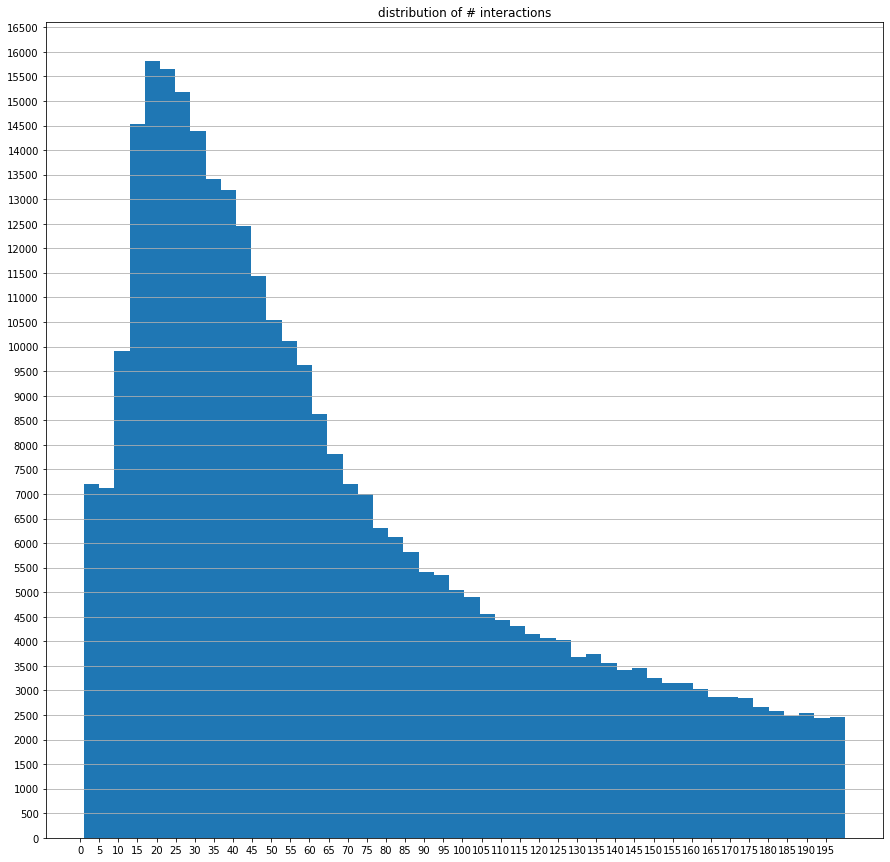

In [12]:
user_interaction_counts = user_movie_df.groupby('UserID').count()['Rating']
fig, ax = plt.subplots(figsize=(15,15))
ax.hist(user_interaction_counts, bins=50, range=(1,200))
ax.set_xticks(np.arange(0,200,5))
ax.set_yticks(np.arange(0,17000,500))
ax.set_title('distribution of # interactions')
ax.grid(which='major', axis='y')
plt.show()

In [13]:
user_interaction_counts.describe()

count    480189.000000
mean        209.251997
std         302.339155
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: Rating, dtype: float64

# Rank Based Recommendations 

In [14]:
def get_top_movie_ids(n, df= user_movie_df):
    '''
    INPUT:
    n - (int) the number of top movies to return
    user_movie_df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_movie (int)- (list) A list of the top 'n' movie ids
    
    '''
    top_movies = list(map(int, df['MovieID'].value_counts().sort_values(ascending=False).head(n).index))
    return top_movies 

In [15]:
def get_movie_names(movie_ids, df= movie_title):
    '''
    INPUT:
    movie_ids - (list) a list of movie ids
    movie_title - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    movie_names - (list) a list of movie names associated with the list of movie ids 
    (this is identified by the Title column)
    '''
    movies = df[df['MovieID'].isin(movie_ids)]
    movies = movies.drop_duplicates('MovieID')
    movie_names = [movies[movies['MovieID']== i]['Title'].values[0][0:-1] for i in movie_ids]
    
    return movie_names 

In [16]:
def get_user_movies(user_id):
    '''
    INPUT: user_id - (int) a user id 

    OUTPUT: 
    movie_id - (list) a list of movie id that has been seen by this particular user
    movie_title - (list) a list of movie names that reflects the movie id 
    '''

    movie_id = user_movie_df[user_movie_df['UserID'] == user_id]['MovieID'].tolist()
    movie_title_list = []
    for i in range(len(movie_id)):
        a = movie_title[movie_title['MovieID'] == movie_id[i]]['Title'].values[0][0:-1]
        movie_title_list.append(a)
    if movie_id == [] and movie_title_list == []:
        raise Exception
    return movie_id,movie_title_list

In [17]:
top_10_id = get_top_movie_ids(10)
top_10_id

[5317, 15124, 14313, 15205, 1905, 6287, 11283, 16377, 16242, 12470]

In [18]:
top_10_name = get_movie_names(top_10_id)
top_10_name

['Miss Congeniality',
 'Independence Day',
 'The Patriot',
 'The Day After Tomorrow',
 'Pirates of the Caribbean: The Curse of the Black Pearl',
 'Pretty Woman',
 'Forrest Gump',
 'The Green Mile',
 'Con Air',
 'Twister']

# User-User Recommendation - Collaborative Filtering 

#### For testing purpose, we're only going to select first 100000 rows of data for testing of the system. 

In [19]:
testing_df = user_movie_df[0:100000]

In [20]:
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with MovieID,UserID,Rating columns
    
    OUTPUT:
    user_item - user item matrix 
    
    DESCRIPTION:
    Return a matrix with UserID as rows and MovieID on the columns with 1 values where a user               interacted with a movie and a 0 otherwise (Use Rating as a metric)
    '''
    mapping = {True:1, False:0}
    
    user_item_df = df.groupby(['UserID', 'MovieID'])['Rating'].max().unstack()
    user_item_df = ~user_item_df.isnull() #True is not empty, false is empty
    user_item = user_item_df.applymap(lambda x: mapping[x])
    
    return user_item 

user_item = create_user_item_matrix(testing_df)

In [21]:
user_item

MovieID,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
UserID,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2649336,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2649375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by movies: 
    1's when a user has interacted with a movie, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users) are          listed first
    
    DESCRIPTION:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered list 
    
    '''
    # compute similarity of each user to the provided user
    similarity = user_item.dot(user_item.loc[user_id])
    # sort by similarity
    similarity = similarity.sort_values(ascending=False)
    # remove the own user's id
    similarity.drop(user_id, inplace=True)
    # create list of just the ids
    most_similar_users = list(similarity.index)
       
    return most_similar_users 

In [23]:
find_similar_users(7)[:10]

[138106,
 2448620,
 135698,
 1249490,
 1249735,
 136197,
 1250817,
 1251306,
 1251664,
 2013981]

In [24]:
def get_user_movies_seen(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by movies: 
    1's when a user has interacted with a movie, 0 otherwise
    
    OUTPUT:
    movie_ids - (list) a list of the movie ids seen by the user
    movie_names - (list) a list of moive names associated with the list of movie ids 
    (this is identified by the Title column in movie_titles)
    
    DESCRIPTION:
    Provides a list of the movie ids and movie titles that have been seen by a user
    '''
    #find the places in which the user_item matrix ==1 for that user
    #look up the columns to get actual movie id
    user_id = int(float(user_id))
    movie_ids = list(user_item.columns[np.where(user_item.loc[user_id]==1)])
    #get movie name from movie id
    movie_names = get_movie_names(movie_ids)
    return movie_ids, movie_names 

In [25]:
get_user_movies_seen(7)

([8, 28], ['What the #$*! Do We Know!?', 'Lilo and Stitch'])

In [26]:
def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    DESCRIPTION:
    Loops through the users based on closeness to the input user_id
    For each user - finds movies the user hasn't seen before and provides them as recs
    Do this until m recommendations are found
    
    '''
    similar_users = find_similar_users(user_id)
    recs = []
    seen_ids, _ = get_user_movies_seen(user_id)

    #iterate thru users
    for user in similar_users:
        ids, names = get_user_movies(user)
        
        #find ids that have not been read by user yet
        not_seen = list(set(ids) - (set(seen_ids) & set(ids)))
        
        #add to recs
        recs.extend(not_seen)
        if(len(recs)>=m): break  #when we have found enough articles
        
    return recs[:m] 

In [27]:
get_movie_names([int(i) for i in user_user_recs(7)])

['The Fugitive',
 'Panic Room',
 'The Purple Rose of Cairo',
 'Das Boot',
 'Chump Change',
 'The Prince and Me',
 'Dummy',
 'The Love Bug',
 "Something's Gotta Give",
 'The Birdcage']

In [28]:
def get_top_sorted_users(user_id, df=testing_df, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by movies: 
    1's when a user has interacted with a movie, 0 otherwise
           
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
    neighbor_id - a neighbor user_id
    similarity - measure of the similarity of each user to the provided user_id
    num_interactions - the number of movies viewed by the user 
    '''
    #find user similarity with dot product
    similarity = user_item.dot(user_item.loc[user_id])
    
    # sort by similarity
    similarity = similarity.sort_values(ascending=False).drop(user_id).to_frame(name='similarity').reset_index()

    #get number of interactions for each user
    num_interactions = df.UserID.value_counts().to_frame('num_interactions')
    
    #combine the value counts with similarity
    neighbors_df = similarity.merge(num_interactions, left_on='UserID', 
                        right_index=True).rename(columns={'UserID':'neighbor_id'})

    neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=False, inplace=True)
    return neighbors_df 

In [29]:
get_top_sorted_users(7).head()

,neighbor_id,similarity,num_interactions
1175,305344,2,28
1321,387418,2,28
87,2439493,2,27
44,1664010,2,25
1443,2118461,2,25


In [30]:
def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by movie id
    rec_names - (list) a list of recommendations for the user by movie title
    
    DESCRIPTION:
    Loops through the users based on closeness to the input user_id
    For each user - finds movies the user hasn't seen before
    Does this until m recommendations are found
    '''
    try:
        #get already seen movie
        user_movie_ids, _ = get_user_movies_seen(user_id)
    except KeyError: #user does not exist
        recs = get_top_movie_ids(m)
        return recs, get_movie_names(recs)

    #get neighbors sorted by similarity (descending)
    neighbors = get_top_sorted_users(user_id).neighbor_id.values
    
    #get top 300 movie id, if outside of top 300 we dont want to recommend
    all_movies_sorted = get_top_movie_ids(300)
    
    recs = []
    
    for user in neighbors:
        neighbor_movie_ids, _ = get_user_movies(user)
        not_seen = list(set(neighbor_movie_ids)-(set(user_movie_ids) & set(neighbor_movie_ids)))
        
        #sort by highest ranked movies, add to list
        not_seen_sorted = list(set(all_movies_sorted) & set(not_seen))
        
        recs.extend(not_seen)
        if(len(recs)>=m):
            recs = recs[:m]
            break; # break when m movies recommendations are found 
    
    return recs, get_movie_names([int(i) for i in recs])

In [31]:
user_user_recs_part2(7)

([1, 2, 3, 4, 5, 6, 7, 9, 10, 11],
 ['Dinosaur Planet',
  'Isle of Man TT 2004 Review',
  'Character',
  "Paula Abdul's Get Up & Dance",
  'The Rise and Fall of ECW',
  'Sick',
  '8 Man',
  "Class of Nuke 'Em High 2",
  'Fighter',
  'Full Frame: Documentary Shorts'])

# Content Based Recommendation 

In [32]:
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('abc')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhengyangzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhengyangzhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhengyangzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package abc to
[nltk_data]     /Users/zhengyangzhang/nltk_data...
[nltk_data]   Package abc is already up-to-date!


In [33]:
def tokenize(x):
    '''
    Tokenize any string into seperate words. 
    Use lemmatizer to break words down into core forms, and then keep only words with meaning

    INPUT:
    x (str) - string to break down

    OUTPUT:
    filtered (array, str) - words that are special to the string
    '''
    stop_words = (set(stopwords.words('english')) | set(nltk.corpus.abc.words()))
    tokens = word_tokenize(x)  #split each message into individual words
    lemmatizer = WordNetLemmatizer()
    clean_tokens=[]
    for token in tokens:
        #clean each token from whitespace and punctuation, and conver to
        #root of word ie walking->walk
        clean_token = lemmatizer.lemmatize(token).lower().strip()
        clean_tokens.append(clean_token)
        
    filtered = [word for word in clean_tokens if word not in stop_words and word.isalpha()]
    return filtered

In [35]:
def make_content_recs(data_id, user_id=True, m=10, df=movie_title):
    '''
    INPUT:
    data_id (str) - id of either user or movie_id
    user_id (bool) - if true, make recs based on user
    m (int) - number of recommendations to give 

    OUTPUT:
    recs (list) - list of movie ids that are recommended
    rec_names (list) - list of movie names that are recommended
        
    DESCRIPTION:
    This content based recommender looks at the articles the user has interacted with.

    It goes through each movie title and using he NLTK library, finds the most common words (related to     content) throughout all the movies.
              
    Based on these most common words, the recommender looks at the sums of words in
    the title of each movie, and based on the number of matches as well as the
    general popularity of the movie it gives back the best recommendations.
    '''
    if(user_id):
        user_id = data_id
        try:
            #get already watched movies 
            movie_ids, _ = get_user_movies_seen(user_id)
        except Exception: #user does not exist
            print('User Doesnt Exist, Recommending Top Movies')
            recs = get_top_movie_ids(m)
            return recs, get_movie_names(recs)
    
    else:
        movie_ids = data_id

    title_data = df.drop_duplicates(subset='MovieID') #drop duplicates 
    titles = title_data[title_data.MovieID.isin(list(map(float, movie_ids)))].Title
    
    #tokenize the words in each movie title
    title_words=[]
    tokenized = tokenize(titles.str.cat(sep=' '))
    title_words.extend(tokenized)
    
    #find the highest occuring words
    common_words = pd.value_counts(title_words).sort_values(ascending=False)[:10].index

    
    # count number of occurences of each common word in other movie titles
    top_matches={}
    for word in common_words:
        #gets occurences of each word in title
        word_count = pd.Series(title_data.Title.str.count(word).fillna(0)) 
        top_matches[word] = word_count 
    
    # num_cols== num of most common words        
    top_matches = pd.DataFrame(top_matches) 

    top_matches['top_matches'] = top_matches.sum(axis=1)
    top_matches['movie_id'] = title_data.MovieID.astype(float)
    
    # #get most interacted with movies
    movie_occurences = pd.DataFrame({'occurences':df.MovieID.value_counts()})

    # #sort matches by most popular movies
    top_matches = top_matches.merge(movie_occurences, left_on='movie_id', right_index=True)
    top_matches.sort_values(['top_matches', 'occurences'], ascending=False, inplace=True)    
    
    #drop already seen movies
    recs_df = top_matches[~top_matches.movie_id.isin(list(map(float, movie_ids)))]
    
    #get rec id and names
    recs = recs_df.movie_id[:m].values
    rec_names = get_movie_names(recs)
    
    return recs, rec_names

In [36]:
make_content_recs(30878,user_id = True)

(array([ 3785., 12334.,    20.,  1237.,  1316.,  1463.,  2062.,  3023.,
         3158.,  3909.]),
 ['The Cramps: Live at Napa State Metal Hospital',
  'VeggieTales: Bible Heroes: Stand Up! Stand Tall! Stand Strong!',
  'Seeta Aur Geeta',
  'The Stars of Star Wars',
  'Voices of a Distant Star',
  'Britannia Hospital',
  'Metallica: A Year and a Half in the Life of Metallica #1',
  'Upstairs, Downstairs: Season 3',
  'John Wayne: Man from Utah/Sagebrush Trail/Riders of Destiny/Star Packer',
  'Madonna: Ciao Italia: Live from Italy'])

In [37]:
make_content_recs(0,user_id = True)

User Doesnt Exist, Recommending Top Movies


([5317, 15124, 14313, 15205, 1905, 6287, 11283, 16377, 16242, 12470],
 ['Miss Congeniality',
  'Independence Day',
  'The Patriot',
  'The Day After Tomorrow',
  'Pirates of the Caribbean: The Curse of the Black Pearl',
  'Pretty Woman',
  'Forrest Gump',
  'The Green Mile',
  'Con Air',
  'Twister'])

In [38]:
make_content_recs([1,2,3,4],user_id = False)

(array([12695.,  1235.,  2706.,  4933.,  8723., 10652., 12508., 13906.,
        16467., 16685.]),
 ['Little Bear: Feel Better Little Bear',
  'The Great Battles of World War II: Battle of Russia',
  'Satte Pe Satta',
  'Pretty Village, Pretty Flame',
  'My Little Pony and Friends: The End of Flutter Valley',
  'The Great Battles of World War II: Battle for the Beach',
  'Chitty Chitty Bang Bang',
  'The Great Battles of World War II: Battle of Britain',
  'Alanis Morissette: Jagged Little Pill, Live',
  "The Battle of the Bulge: World War II's Deadliest Battle"])

# Matrix Factorization 

#### Because the data size is extremely big, I will only take combined_data to perform matrix factorization. 

In [37]:
part_user_data = read_file('combined_data_1.txt')

In [38]:
idx = np.random.randint(0,24053763,5000)

In [39]:
part_data = part_user_data.iloc[idx]

In [40]:
part_data['UserID'] = part_data['UserID'].astype('int')

<ipython-input-40-0f1a5b07bb8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['UserID'] = part_data['UserID'].astype('int')


In [41]:
part_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 7561747 to 10466647
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   UserID   5000 non-null   int64 
 1   MovieID  5000 non-null   int64 
 2   Rating   5000 non-null   object
dtypes: int64(2), object(1)
memory usage: 156.2+ KB


In [42]:
part_data.head()

,UserID,MovieID,Rating
7561747,17184,1521,3
23791248,1944086,4432,3
21759434,316492,4109,3
20895107,278882,3928,5
13538228,458457,2580,3


In [44]:
user_item_matrix = create_user_item_matrix(part_data)

In [45]:
user_item_matrix

MovieID,3,8,17,18,23,25,28,30,33,36,...,4477,4478,4479,4484,4485,4488,4490,4492,4493,4496
UserID,,,,,,,,,,,,,,,,,,,,,
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2648316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2648582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
u, s, v = scipy.linalg.svd(user_item_matrix)

In [47]:
sum_errs = []
num_latent_feats=np.arange(10,710,20)
for k in num_latent_feats:
    # restructure with k latent features
    u_new = u[:, :k]
    s_new = np.diag(s[:k])
    v_new = v[:k, :]
    
    est_mtx = np.around(np.dot(np.dot(u_new,s_new), v_new))

    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, est_mtx)
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs))) #first sum cols then rows
    sum_errs.append(err)

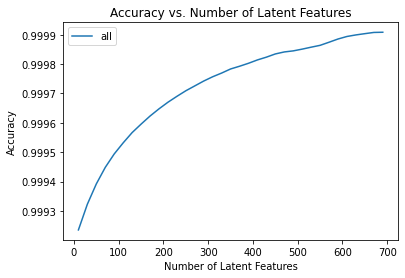

In [48]:
plt.plot(num_latent_feats, 1 - (np.array(sum_errs)/(user_item_matrix.shape[0]*user_item_matrix.shape[1])),
        label='all');
plt.legend(loc='best')
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');
plt.show();

> From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations. Instead, we might split our dataset into a training and test set of data, as shown in the cell below.

In [49]:
df_idx = np.random.randint(0,24053763,20000)

In [50]:
part_data_df = part_user_data.iloc[df_idx]

In [51]:
part_data_df['UserID'] = part_data_df['UserID'].astype('int')

<ipython-input-51-9535c3e1bf4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data_df['UserID'] = part_data_df['UserID'].astype('int')


In [52]:
df_train = part_data_df.head(20000)
test_idx = np.random.randint(0,20000,5000)
df_test = part_data_df.iloc[test_idx]

In [53]:
def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique movies for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique movies for each column)
    test_idx - all of the test user ids
    test_movie - all of the test movie ids
    
    '''
   
    user_item_train = create_user_item_matrix(df_train)

    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = user_item_test.index

    test_movie =  user_item_test.columns.values
    
    return user_item_train, user_item_test, test_idx, test_movie

user_item_train, user_item_test, test_idx, test_movie = create_test_and_train_user_item(df_train, df_test)

In [54]:
u_train, s_train, v_train = scipy.linalg.svd(user_item_train)

In [55]:
train_idx = user_item_train.index
common_idx = set(set(train_idx) & set(test_idx))

In [56]:
train_common_idx = user_item_train.index.isin(test_idx)
train_common_col = user_item_train.columns.isin(test_movie)

In [57]:
u_test = u_train[train_common_idx, :]
v_test = v_train[:, train_common_col]

In [58]:
user_item_test = user_item_test.loc[common_idx]

In [59]:
sum_train_errs=[]
sum_test_errs=[]


num_latent_feat=np.arange(5,710,10)
for k in num_latent_feat: #iterate thru number of latent features to get predictions
    u_train_lat, s_train_lat, v_train_lat = u_train[:, :k], np.diag(s_train[:k]), v_train[:k, :]
    u_test_lat, v_test_lat = u_test[:, :k], v_test[:k,:]
    user_item_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), v_train_lat))
    user_item_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), v_test_lat))

    #calculate error
    diffs_train = np.subtract(user_item_train, user_item_train_preds)
    diffs_test = np.subtract(user_item_test.loc[common_idx, :], user_item_test_preds)
    
    train_err = np.sum(np.sum(np.abs(diffs_train))) #first sum cols then rows
    sum_train_errs.append(train_err)
    
    test_err = np.sum(np.sum(np.abs(diffs_test))) #first sum cols then rows
    sum_test_errs.append(test_err)

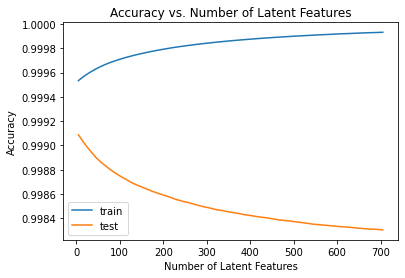

In [60]:
#plot errors
plt.plot(num_latent_feat, 1 - (np.array(sum_train_errs)/(user_item_train.shape[0]*user_item_train.shape[1])), label='train');
plt.plot(num_latent_feat, 1 - (np.array(sum_test_errs)/(user_item_test.shape[0]*user_item_test.shape[1])), label='test');
plt.legend(loc='best')
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');
plt.show();

> As we can see from the graph above, the accuracy for testing is actually the inverse of the one we saw in the training set. 

> The explanation for this is that with increasing latent features causes overfitting during training. 

> This means that even though our model performs better on the training set it does not generalize well to out of sample predictions. Based on this I would try to keep fewer latent features.